### Importing libraries

In [13]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

### I use Requests library to get wikipedia page as html, then I parse it with BeautifulSoup and finally get the table

In [14]:
test=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
html=test.content

In [15]:
soup = BeautifulSoup(html, 'html.parser')
table=soup.find('table')

### I find table rows in the table's body and then cells in each row, then I assign the row in the table to the ith row of my dataframe

In [16]:
tbody=table.tbody
table_rows = table.find_all('tr')
df=pd.DataFrame(columns=['PostalCode','Borough','Neighborhood'])

for i,tr in zip(range(len(table_rows)),table_rows):
    td = tr.find_all('td')
    if len(td)==0: #If row is empty, skip to next row
        continue
    row = [traw.text.replace('\n','') for traw in td] #Strip \n character at the end of each row
    df.loc[i]=row

    

Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [17]:
df=df[df['Borough']!='Not assigned']

More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [18]:
df1=df.groupby(['PostalCode','Borough'])['Neighborhood'].apply(lambda x: "%s" % ', '.join(x)).reset_index()

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [19]:
df1['Neighborhood'][df1['Neighborhood']=='Not assigned']=df1['Borough'][df1['Neighborhood']=='Not assigned']

In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [20]:
print("Number of DataFrame rows: "+str(df1.shape[0]))

Number of DataFrame rows: 103


# Get Latitude and Longitude from file

In [21]:
latlon=pd.read_csv('Geospatial_Coordinates.csv')

In [22]:
df2=df1.merge(latlon,how='left',left_on='PostalCode',right_on='Postal Code')

In [23]:
df2.drop('Postal Code',inplace=True,axis=1)

In [24]:
df2

PostalCode           Borough  \
0          M1B       Scarborough   
1          M1C       Scarborough   
2          M1E       Scarborough   
3          M1G       Scarborough   
4          M1H       Scarborough   
5          M1J       Scarborough   
6          M1K       Scarborough   
7          M1L       Scarborough   
8          M1M       Scarborough   
9          M1N       Scarborough   
10         M1P       Scarborough   
11         M1R       Scarborough   
12         M1S       Scarborough   
13         M1T       Scarborough   
14         M1V       Scarborough   
15         M1W       Scarborough   
16         M1X       Scarborough   
17         M2H        North York   
18         M2J        North York   
19         M2K        North York   
20         M2L        North York   
21         M2M        North York   
22         M2N        North York   
23         M2P        North York   
24         M2R        North York   
25         M3A        North York   
26         M3B        North York   
27         M3C        North York   
28         M3H        North York   
29         M3J        North York   
..         ...               ...   
73         M6C              York   
74         M6E              York   
75         M6G  Downtown Toronto   
76         M6H      West Toronto   
77         M6J      West Toronto   
78         M6K      West Toronto   
79         M6L        North York   
80         M6M              York   
81         M6N              York   
82         M6P      West Toronto   
83         M6R      West Toronto   
84         M6S      West Toronto   
85         M7A      Queen's Park   
86         M7R       Mississauga   
87         M7Y      East Toronto   
88         M8V         Etobicoke   
89         M8W         Etobicoke   
90         M8X         Etobicoke   
91         M8Y         Etobicoke   
92         M8Z         Etobicoke   
93         M9A      Queen's Park   
94         M9B         Etobicoke   
95         M9C         Etobicoke   
96         M9L        North York   
97         M9M        North York   
98         M9N              York   
99         M9P         Etobicoke   
100        M9R         Etobicoke   
101        M9V         Etobicoke   
102        M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                       Rouge, Malvern  43.806686 -79.194353  
1               Highland Creek, Rouge Hill, Port Union  43.784535 -79.160497  
2                    Guildwood, Morningside, West Hill  43.763573 -79.188711  
3                                               Woburn  43.770992 -79.216917  
4                                            Cedarbrae  43.773136 -79.239476  
5                                  Scarborough Village  43.744734 -79.239476  
6          East Birchmount Park, Ionview, Kennedy Park  43.727929 -79.262029  
7                      Clairlea, Golden Mile, Oakridge  43.711112 -79.284577  
8      Cliffcrest, Cliffside, Scarborough Village West  43.716316 -79.239476  
9                          Birch Cliff, Cliffside West  43.692657 -79.264848  
10   Dorset Park, Scarborough Town Centre, Wexford ...  43.757410 -79.273304  
11                                   Maryvale, Wexford  43.750072 -79.295849  
12                                           Agincourt  43.794200 -79.262029  
13             Clarks Corners, Sullivan, Tam O'Shanter  43.781638 -79.304302  
14   Agincourt North, L'Amoreaux East, Milliken, St...  43.815252 -79.284577  
15                                     L'Amoreaux West  43.799525 -79.318389  
16                                         Upper Rouge  43.836125 -79.205636  
17                                   Hillcrest Village  43.803762 -79.363452  
18                        Fairview, Henry Farm, Oriole  43.778517 -79.346556  
19                                     Bayview Village  43.786947 -79.385975  
20                            Silver Hills, York Mills  43.757490 -79.374714  
21                             Ne

# Clustering and Mapping

In [25]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium


In [26]:
latitude=43.70011 
longitude=-79.4163
#Toronto latitude and longitude

## First Toronto Map

In [27]:
map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

In [28]:

for lat,lon,borough,neighborhood in zip(df2['Latitude'],df2['Longitude'],df2['Borough'],df2['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=False)
    color='blue'
    if 'Toronto' in borough: color='red'
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

In [29]:
map_toronto

In [30]:
#Get only rows that contain Toronto as Borough
df2Tor=df2[df2['Borough'].str.contains('Toronto')]

In [31]:
df2Tor.head()

PostalCode          Borough                    Neighborhood   Latitude  \
37        M4E     East Toronto                     The Beaches  43.676357   
41        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
42        M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
43        M4M     East Toronto                 Studio District  43.659526   
44        M4N  Central Toronto                   Lawrence Park  43.728020   

    Longitude  
37 -79.293031  
41 -79.352188  
42 -79.315572  
43 -79.340923  
44 -79.388790

## Second Toronto Map with only Toronto Borough

In [32]:
latitude,longitude=43.70011,-79.4163
Tor_map=folium.Map(location=[latitude,longitude],zoom_start=12)
for lat,lon,borough,neighborhood in zip(df2Tor['Latitude'],df2Tor['Longitude'],df2Tor['Borough'],df2Tor['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=False)
    color='blue'
    if 'Toronto' in borough: color='red'
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Tor_map)

In [33]:
Tor_map

# Using lab's Foursquare API

In [34]:
CLIENT_ID = 'secret' # my Foursquare ID
CLIENT_SECRET = 'secret' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=200

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): #Function to get nearby venues for each location
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Get venues for each neighborhood

In [36]:
toronto_venues = getNearbyVenues(names=df2Tor['Neighborhood'],
                                   latitudes=df2Tor['Latitude'],
                                   longitudes=df2Tor['Longitude']
                                  )



The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

## Get number of venues in each neighborhood

In [37]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Adelaide, King, Richmond                                              100   
Berczy Park                                                            57   
Brockton, Exhibition Place, Parkdale Village                           22   
Business Reply Mail Processing Centre 969 Eastern                      19   
CN Tower, Bathurst Quay, Island airport, Harbou...                     16   
Cabbagetown, St. James Town                                            44   
Central Bay Street                                                     81   
Chinatown, Grange Park, Kensington Market                              92   
Christie                                                               16   
Church and Wellesley                                                   83   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             35   
Davisville North                                                        7   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                     15   
Design Exchange, Toronto Dominion Centre                              100   
Dovercourt Village, Dufferin                                           15   
First Canadian Place, Underground city                                100   
Forest Hill North, Forest Hill West                                     4   
Harbord, University of Toronto                                         35   
Harbourfront                                                           50   
Harbourfront East, Toronto Islands, Union Station                     100   
High Park, The Junction South                                          24   
Lawrence Park                                                           4   
Little Portugal, Trinity                                               62   
Moore Park, Summerhill East                                             4   
North Toronto West                                                     20   
Parkdale, Roncesvalles                                                 14   
Rosedale                                                                4   
Roselawn                                                                2   
Runnymede, Swansea                                                     38   
Ryerson, Garden District                                              100   
St. James Town                                                        100   
Stn A PO Boxes 25 The Esplanade                                        98   
Studio District                                                        38   
The Annex, North Midtown, Yorkville                                    22   
The Beaches                                                             4   
The Beaches West, India Bazaar                                         20   
The Danforth West, Riverdale                                           43   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Adelaide, King, Richmond                                               100   
Berczy Park                                                             57   
Brockton, Exhibition Place, Parkdale Village                            22   
Business Reply Mail Processing Centre 969 Eastern                       19   
CN Tower, Bathurst Quay, Island airport, Harbou...                      16   
Cabbagetown, St. James Town                                             44   
Central Bay Street                                                      81   
Chinatown, Grange Park, Kensington Market                               92   
Christie                                                                16   
Church and Wellesley                                                    83   
Commerce Court, Victoria Hotel     

In [38]:
len(toronto_venues['Venue Category'].unique()) #How many venue categorys are there?

236

# Analyze each neighborhood

## Create dummies

In [41]:
tor_onehot=pd.get_dummies(toronto_venues[['Venue Category']],prefix="",prefix_sep="")

Neighborhood  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0  The Beaches                  0        0                   0             0   
1  The Beaches                  0        0                   0             0   
2  The Beaches                  0        0                   0             0   
3  The Beaches                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   

   Antique Shop  ...  Thrift / Vintage Store  Toy / Game Store  Trail  \
0             0  ...                       0                 0      1   
1             0  ...                       0                 0      0   
2             0  ...                       0                 0      0   
3             0  ...                       0                 0      0   

   Train Station  Vegetarian / Vegan Restaurant  Video Game Store  \
0              0                              0                 0   
1              0                              0                 0   
2              0                              0                 0   
3              0                              0                 0   

   Vietnamese Restaurant  Wine Bar  Wings Joint  Yoga Studio  
0                      0         0            0            0  
1                      0         0            0            0  
2                      0         0            0            0  
3                      0         0            0            0  

[4 rows x 236 columns]

In [49]:
tor_onehot=tor_onehot[['Neighborhood']+list(tor_onehot.drop('Neighborhood',axis=1).columns)] #Add neighborhood at the beginning

## Venue Frequency

In [55]:
tor_grouped=tor_onehot.groupby('Neighborhood').mean().reset_index()
tor_grouped

Neighborhood  Afghan Restaurant  \
0                            Adelaide, King, Richmond           0.000000   
1                                         Berczy Park           0.000000   
2        Brockton, Exhibition Place, Parkdale Village           0.000000   
3   Business Reply Mail Processing Centre 969 Eastern           0.000000   
4   CN Tower, Bathurst Quay, Island airport, Harbo...           0.000000   
5                         Cabbagetown, St. James Town           0.000000   
6                                  Central Bay Street           0.000000   
7           Chinatown, Grange Park, Kensington Market           0.000000   
8                                            Christie           0.000000   
9                                Church and Wellesley           0.012048   
10                     Commerce Court, Victoria Hotel           0.000000   
11                                         Davisville           0.000000   
12                                   Davisville North           0.000000   
13  Deer Park, Forest Hill SE, Rathnelly, South Hi...           0.000000   
14           Design Exchange, Toronto Dominion Centre           0.000000   
15                       Dovercourt Village, Dufferin           0.000000   
16             First Canadian Place, Underground city           0.000000   
17                Forest Hill North, Forest Hill West           0.000000   
18                     Harbord, University of Toronto           0.000000   
19                                       Harbourfront           0.000000   
20  Harbourfront East, Toronto Islands, Union Station           0.000000   
21                      High Park, The Junction South           0.000000   
22                                      Lawrence Park           0.000000   
23                           Little Portugal, Trinity           0.000000   
24                        Moore Park, Summerhill East           0.000000   
25                                 North Toronto West           0.000000   
26                             Parkdale, Roncesvalles           0.000000   
27                                           Rosedale           0.000000   
28                                           Roselawn           0.000000   
29                                 Runnymede, Swansea           0.000000   
30                           Ryerson, Garden District           0.000000   
31                                     St. James Town           0.000000   
32                    Stn A PO Boxes 25 The Esplanade           0.000000   
33                                    Studio District           0.000000   
34                The Annex, North Midtown, Yorkville           0.000000   
35                                        The Beaches           0.000000   
36                     The Beaches West, India Bazaar           0.000000   
37                       The Danforth West, Riverdale           0.000000   

    Airport  Airport Food Court  Airport Gate  Airport Lounge  \
0    0.0000              0.0000        0.0000           0.000   
1    0.0000              0.0000        0.0000           0.000   
2    0.0000              0.0000        0.0000           0.000   
3    0.0000              0.0000        0.0000           0.000   
4    0.0625              0.0625        0.0625           0.125   
5    0.0000              0.0000        0.0000           0.000   
6    0.0000              0.0000        0.0000           0.000   
7    0.0000              0.0000        0.0000           0.000   
8    0.0000              0.0000        0.0000           0.000   
9    0.0000              0.0000        0.0000           0.000   
10   0.0000              0.0000        0.0000           0.000   
11   0.0000              0.0000        0.0000           0.000   
12   0.0000              0.0000        0.0000           0.000   
13   0.0000              0.0000        0.0000           0.000   
14   0.0000              0.0000        0.0000           0.000   
15   0.0000              0.0000     

## Create function from lab to return most common venues for each neighborhood

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tor_grouped['Neighborhood']

for ind in np.arange(tor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                        Berczy Park           Coffee Shop   
2       Brockton, Exhibition Place, Parkdale Village           Coffee Shop   
3  Business Reply Mail Processing Centre 969 Eastern    Light Rail Station   
4  CN Tower, Bathurst Quay, Island airport, Harbo...        Airport Lounge   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café                   Bar            Steakhouse   
1                Bakery    Seafood Restaurant              Beer Bar   
2        Breakfast Spot                  Café                Bakery   
3           Yoga Studio                   Spa         Garden Center   
4       Airport Service      Airport Terminal                   Bar   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       Thai Restaurant   American Restaurant                Bakery   
1          Cocktail Bar            Steakhouse        Farmers Market   
2               Stadium         Burrito Place        Sandwich Place   
3                Garden  Fast Food Restaurant        Farmers Market   
4      Sculpture Garden         Boat or Ferry                 Plane   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0      Sushi Restaurant      Asian Restaurant           Burger Joint  
1           Cheese Shop                  Café    Japanese Restaurant  
2            Restaurant          Climbing Gym            Yoga Studio  
3            Comic Shop                  Park            Pizza Place  
4       Harbor / Marina              Boutique            Coffee Shop

# Run K Means for clustering

In [65]:
from sklearn.cluster import KMeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Check for optimal number of clusters

In [82]:
kclusters = 12
inertias=[]
for k in range(1,kclusters):
    tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(tor_grouped_clustering)
    inertias.append(kmeans.inertia_)


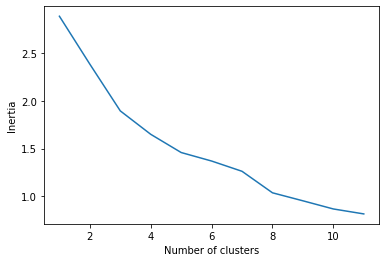

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(1,12),inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Not clear what the optimum number of clusters is...I will use 5

In [84]:
tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=5, random_state=0).fit(tor_grouped_clustering)

In [86]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) #Insert labels to previous DataFrame

ValueError: cannot insert Cluster Labels, already exists

In [87]:
tor_merged = df2Tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tor_merged.head()

PostalCode          Borough                    Neighborhood   Latitude  \
37        M4E     East Toronto                     The Beaches  43.676357   
41        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
42        M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
43        M4M     East Toronto                 Studio District  43.659526   
44        M4N  Central Toronto                   Lawrence Park  43.728020   

    Longitude  Cluster Labels       1st Most Common Venue  \
37 -79.293031               4           Health Food Store   
41 -79.352188               0            Greek Restaurant   
42 -79.315572               0                        Park   
43 -79.340923               0                        Café   
44 -79.388790               2  Construction & Landscaping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
37                 Trail                   Pub          Dessert Shop   
41           Coffee Shop        Ice Cream Shop    Italian Restaurant   
42             Pet Store         Burrito Place    Italian Restaurant   
43           Coffee Shop   American Restaurant                Bakery   
44                  Park           Swim School              Bus Line   

   5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
37    Falafel Restaurant             Event Space  Ethiopian Restaurant   
41             Bookstore  Furniture / Home Store            Restaurant   
42      Sushi Restaurant                 Brewery                   Pub   
43    Italian Restaurant             Cheese Shop                  Bank   
44           Yoga Studio                   Diner    Falafel Restaurant   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
37     Electronics Store  Eastern European Restaurant    Dumpling Restaurant  
41               Brewery              Bubble Tea Shop   Caribbean Restaurant  
42        Ice Cream Shop            Fish & Chips Shop   Fast Food Restaurant  
43                 Diner             Stationery Store         Clothing Store  
44           Event Space         Ethiopian Restaurant      Electronics Store

# Map with clusters to see distribution

In [88]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine clusters and add names

In [97]:
#### Cluster 1

cluster1=tor_merged.loc[tor_merged['Cluster Labels'] == 0, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

#### Cluster 2

cluster2=tor_merged.loc[tor_merged['Cluster Labels'] == 1, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

#### Cluster 3

cluster3=tor_merged.loc[tor_merged['Cluster Labels'] == 2, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

#### Cluster 4

cluster4=tor_merged.loc[tor_merged['Cluster Labels'] == 3, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

#### Cluster 5

cluster5=tor_merged.loc[tor_merged['Cluster Labels'] == 4, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

In [92]:
cluster1

Borough  Cluster Labels 1st Most Common Venue  \
41      East Toronto               0      Greek Restaurant   
42      East Toronto               0                  Park   
43      East Toronto               0                  Café   
45   Central Toronto               0        Clothing Store   
46   Central Toronto               0   Sporting Goods Shop   
47   Central Toronto               0           Coffee Shop   
49   Central Toronto               0           Coffee Shop   
51  Downtown Toronto               0            Restaurant   
52  Downtown Toronto               0           Coffee Shop   
53  Downtown Toronto               0           Coffee Shop   
54  Downtown Toronto               0           Coffee Shop   
55  Downtown Toronto               0                  Café   
56  Downtown Toronto               0           Coffee Shop   
57  Downtown Toronto               0           Coffee Shop   
58  Downtown Toronto               0           Coffee Shop   
59  Downtown Toronto               0           Coffee Shop   
60  Downtown Toronto               0           Coffee Shop   
61  Downtown Toronto               0           Coffee Shop   
65   Central Toronto               0                  Café   
66  Downtown Toronto               0                  Café   
67  Downtown Toronto               0                  Café   
68  Downtown Toronto               0        Airport Lounge   
69  Downtown Toronto               0           Coffee Shop   
70  Downtown Toronto               0           Coffee Shop   
75  Downtown Toronto               0         Grocery Store   
76      West Toronto               0              Pharmacy   
77      West Toronto               0                   Bar   
78      West Toronto               0           Coffee Shop   
82      West Toronto               0                  Café   
83      West Toronto               0             Gift Shop   
84      West Toronto               0           Coffee Shop   
87      East Toronto               0    Light Rail Station   

   2nd Most Common Venue      3rd Most Common Venue  \
41           Coffee Shop             Ice Cream Shop   
42             Pet Store              Burrito Place   
43           Coffee Shop        American Restaurant   
45                   Gym                       Park   
46           Coffee Shop             Clothing Store   
47        Sandwich Place                Pizza Place   
49                   Pub        American Restaurant   
51           Coffee Shop                Pizza Place   
52   Japanese Restaurant           Sushi Restaurant   
53                  Park                        Pub   
54        Clothing Store  Middle Eastern Restaurant   
55            Restaurant                Coffee Shop   
56                Bakery         Seafood Restaurant   
57    Italian Restaurant             Sandwich Place   
58                  Café                        Bar   
59                 Hotel                   Aquarium   
60                  Café                      Hotel   
61                  Café                      Hotel   
65        Sandwich Place                Coffee Shop   
66            Restaurant                        Bar   
67                   Bar      Vietnamese Restaurant   
68       Airport Service           Airport Terminal   
69            Restaurant                       Café   
70                  Café                 Steakhouse   
75                  Café                       Park   
76                Bakery                Supermarket   
77           Coffee Shop                Men's Store   
78        Breakfast Spot                       Café   
82    Mexican Restaurant                        Bar   
83            Restaurant               Dessert Shop   
84                  Café                  Bookstore   
87           Yoga Studio                        Spa   

        4th Most Common Venue        5th Most Common Venue  \
41         Italian Restaurant                    Bookstore   
42         Italian Restaur

In [91]:
cluster1['Name']='Coffee areas'

In [93]:
cluster2

Borough  Cluster Labels 1st Most Common Venue  \
48   Central Toronto               1            Restaurant   
50  Downtown Toronto               1                  Park   
64   Central Toronto               1                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
48                  Park            Playground          Tennis Court   
50            Playground                 Trail           Yoga Studio   
64                 Trail         Jewelry Store      Sushi Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
48      Doner Restaurant    Dim Sum Restaurant                 Diner   
50    Dim Sum Restaurant    Falafel Restaurant           Event Space   
64           Yoga Studio                 Diner    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
48        Discount Store               Dog Run          Dumpling Restaurant  
50  Ethiopian Restaurant     Electronics Store  Eastern European Restaurant  
64           Event Space  Ethiopian Restaurant            Electronics Store

In [94]:
cluster2['Name']='Outdoor area'

In [98]:
cluster3

Borough  Cluster Labels       1st Most Common Venue  \
44  Central Toronto               2  Construction & Landscaping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
44                  Park           Swim School              Bus Line   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
44           Yoga Studio                 Diner    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
44           Event Space  Ethiopian Restaurant      Electronics Store

In [99]:
cluster3['Name']='Just central Toronto'

In [109]:
cluster4

Borough  Cluster Labels 1st Most Common Venue  \
63  Central Toronto               3                Garden   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
63          Home Service           Yoga Studio        Farmers Market   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
63    Falafel Restaurant           Event Space  Ethiopian Restaurant   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  \
63     Electronics Store  Eastern European Restaurant    Dumpling Restaurant   

                   Name  
63  Outlier just like 3

In [108]:
cluster4['Name']='Outlier just like 3'

In [106]:
cluster5

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
37  East Toronto               4     Health Food Store                 Trail   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37                   Pub          Dessert Shop    Falafel Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37           Event Space  Ethiopian Restaurant     Electronics Store   

          9th Most Common Venue 10th Most Common Venue          Name  
37  Eastern European Restaurant    Dumpling Restaurant  East Toronto

In [110]:
cluster5['Name']='East Toronto'